<a href="https://colab.research.google.com/github/Shashank251225/seoul-bike-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Seoul Bike Sharing Demand Prediction** 

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Importing Modules**

In [1]:
# Lets import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

# **Mounting the drive and loading the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/   seoul bike project 2/Seoul.csv"
seol_bike_df = pd.read_csv(file_path,encoding="latin")

#**Data pre-processing and Understanding data**

In [4]:
# Checking the top 5 rows od the dataset
seol_bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Checking the bottom 5 rows of the dataset
seol_bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [6]:
# Checking the shape of the dataset with rows and columns
seol_bike_df.shape

(8760, 14)

In [7]:
# Checking all the columns name
seol_bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# Checking information about the dataset
seol_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# Looking for the description of the dataset
seol_bike_df.describe(include='all').transpose()

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN



1. The dataset contain 8760 rows and 14 columns.
2. In a Day we have 24 hours and we have 365 days a year so if we multiplied 365*24 which gives 8760 , which represents the number of line in the dataset.
3. Looking at the dataset , there seems to be some fields are categorical in nature , but some are in integer/float type also.
4. One column is date type.
5. We will analyse and finalise whether to convert them to categorical or threat as integer.




# **Preprocessing the data**

**1. Treating Null/Missing values**

In [10]:
# Checking null values of data 
seol_bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
# Checking Missing values of the data
seol_bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**2. Duplicate check**

In [12]:
# Checking duplicate
seol_bike_df.duplicated().sum()

0



1. In our dataset we came to know that there is no missing values and null values present.
2. There is no duplicates values also in our dataset



# **Data Cleaning**
1. Chechking value_counts() for entire dataframe.
This will help us to identify any Unknown/Junk values present in the dataset.

In [13]:
seol_bike_dummy = seol_bike_df.iloc[:,0:14]

In [14]:
for col in seol_bike_dummy:
  print(seol_bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: Date, Length: 365, dtype: int64 



0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64 



0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64 



 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature(°C), Length: 546, dtype: int64 



53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity(%), 

There seems to be no Junk/Unknown files present in the dataset.

**2. Splitting  the Date column**

In [15]:
# converting date column dtype object to date 
seol_bike_df['Date']=pd.to_datetime(seol_bike_df['Date'])

In [16]:
# split day of week, month and year in three column
seol_bike_df['day'] = seol_bike_df['Date'].dt.day_name()                               # extract week name from Date column
seol_bike_df["month"] = seol_bike_df['Date'].dt.month_name()                           # extract month name from Date column
seol_bike_df["year"] = seol_bike_df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [17]:
# drop the Date column
seol_bike_df.drop(columns=['Date'],inplace=True,axis=1)

In [18]:
seol_bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day       day  \
0           0.0            0.0  Winter  No Holiday             Yes  Thursday   
1           0.0            0.0  Winter  No Holiday             Yes  Thursday   
2           0.0            0.0  Winter  No Holiday             Yes  Thursday   
3           0.0            0.0  Winter  No Holiday             Yes  Thursday   
4           0.0            0.0  Winter  No Holiday             Yes  Thursday   

     month  year  
0  January  2017  
1  January  2017  
2  January  2017  
3  January  2017  
4  January  2017

In [19]:
# Dropping the year column
seol_bike_df.drop(columns=['year'],inplace=True,axis=1)

In [20]:
seol_bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day       day  \
0           0.0            0.0  Winter  No Holiday             Yes  Thursday   
1           0.0            0.0  Winter  No Holiday             Yes  Thursday   
2           0.0            0.0  Winter  No Holiday             Yes  Thursday   
3           0.0            0.0  Winter  No Holiday             Yes  Thursday   
4           0.0            0.0  Winter  No Holiday             Yes  Thursday   

     month  
0  January  
1  January  
2  January  
3  January  
4  January



1.   We convert the "date" column into three different column i.e "year","month","day".
2.   The "year" column in our data set is basically contain the 2 unique number contains the details of year from 2017 december and 2018 november so if we consider this is a one year then we don't need the year column so we drop it.
3. We drop the "Date" column because now we didn't require that column.



## **Exploratory data analysis**
 

**1. Changing the Data type**

*   When we observe the data we realize that Hour column is a numerical column 
it is a time stamp so we have to treat Hour as a categorical feature.If we don't change then ,while doing further analysis and correlated with these columns and the values are not actually true so we can mislead by this.
* First we analyse the category data and then we proceed with the numerical data type. 

In [21]:
seol_bike_df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
day                             7
month                          12
dtype: int64

In [22]:
# convert Hour column integer to Categorical 
seol_bike_df['Hour']=seol_bike_df['Hour'].astype('object')

In [23]:
# Divide Data in categorical and numerical features
numeric_features= seol_bike_df.select_dtypes(exclude='object')
categorical_features=seol_bike_df.select_dtypes(include='object')

In [24]:
numeric_features.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

In [25]:
categorical_features.head()

Hour Seasons     Holiday Functioning Day       day    month
0    0  Winter  No Holiday             Yes  Thursday  January
1    1  Winter  No Holiday             Yes  Thursday  January
2    2  Winter  No Holiday             Yes  Thursday  January
3    3  Winter  No Holiday             Yes  Thursday  January
4    4  Winter  No Holiday             Yes  Thursday  January

In [26]:
seol_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   objec

In [27]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(seol_bike_df[i].value_counts())


 
column name  :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
column name  :  day
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day, dtype: int64

 
column name  :  month
January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
February     672
Name: 

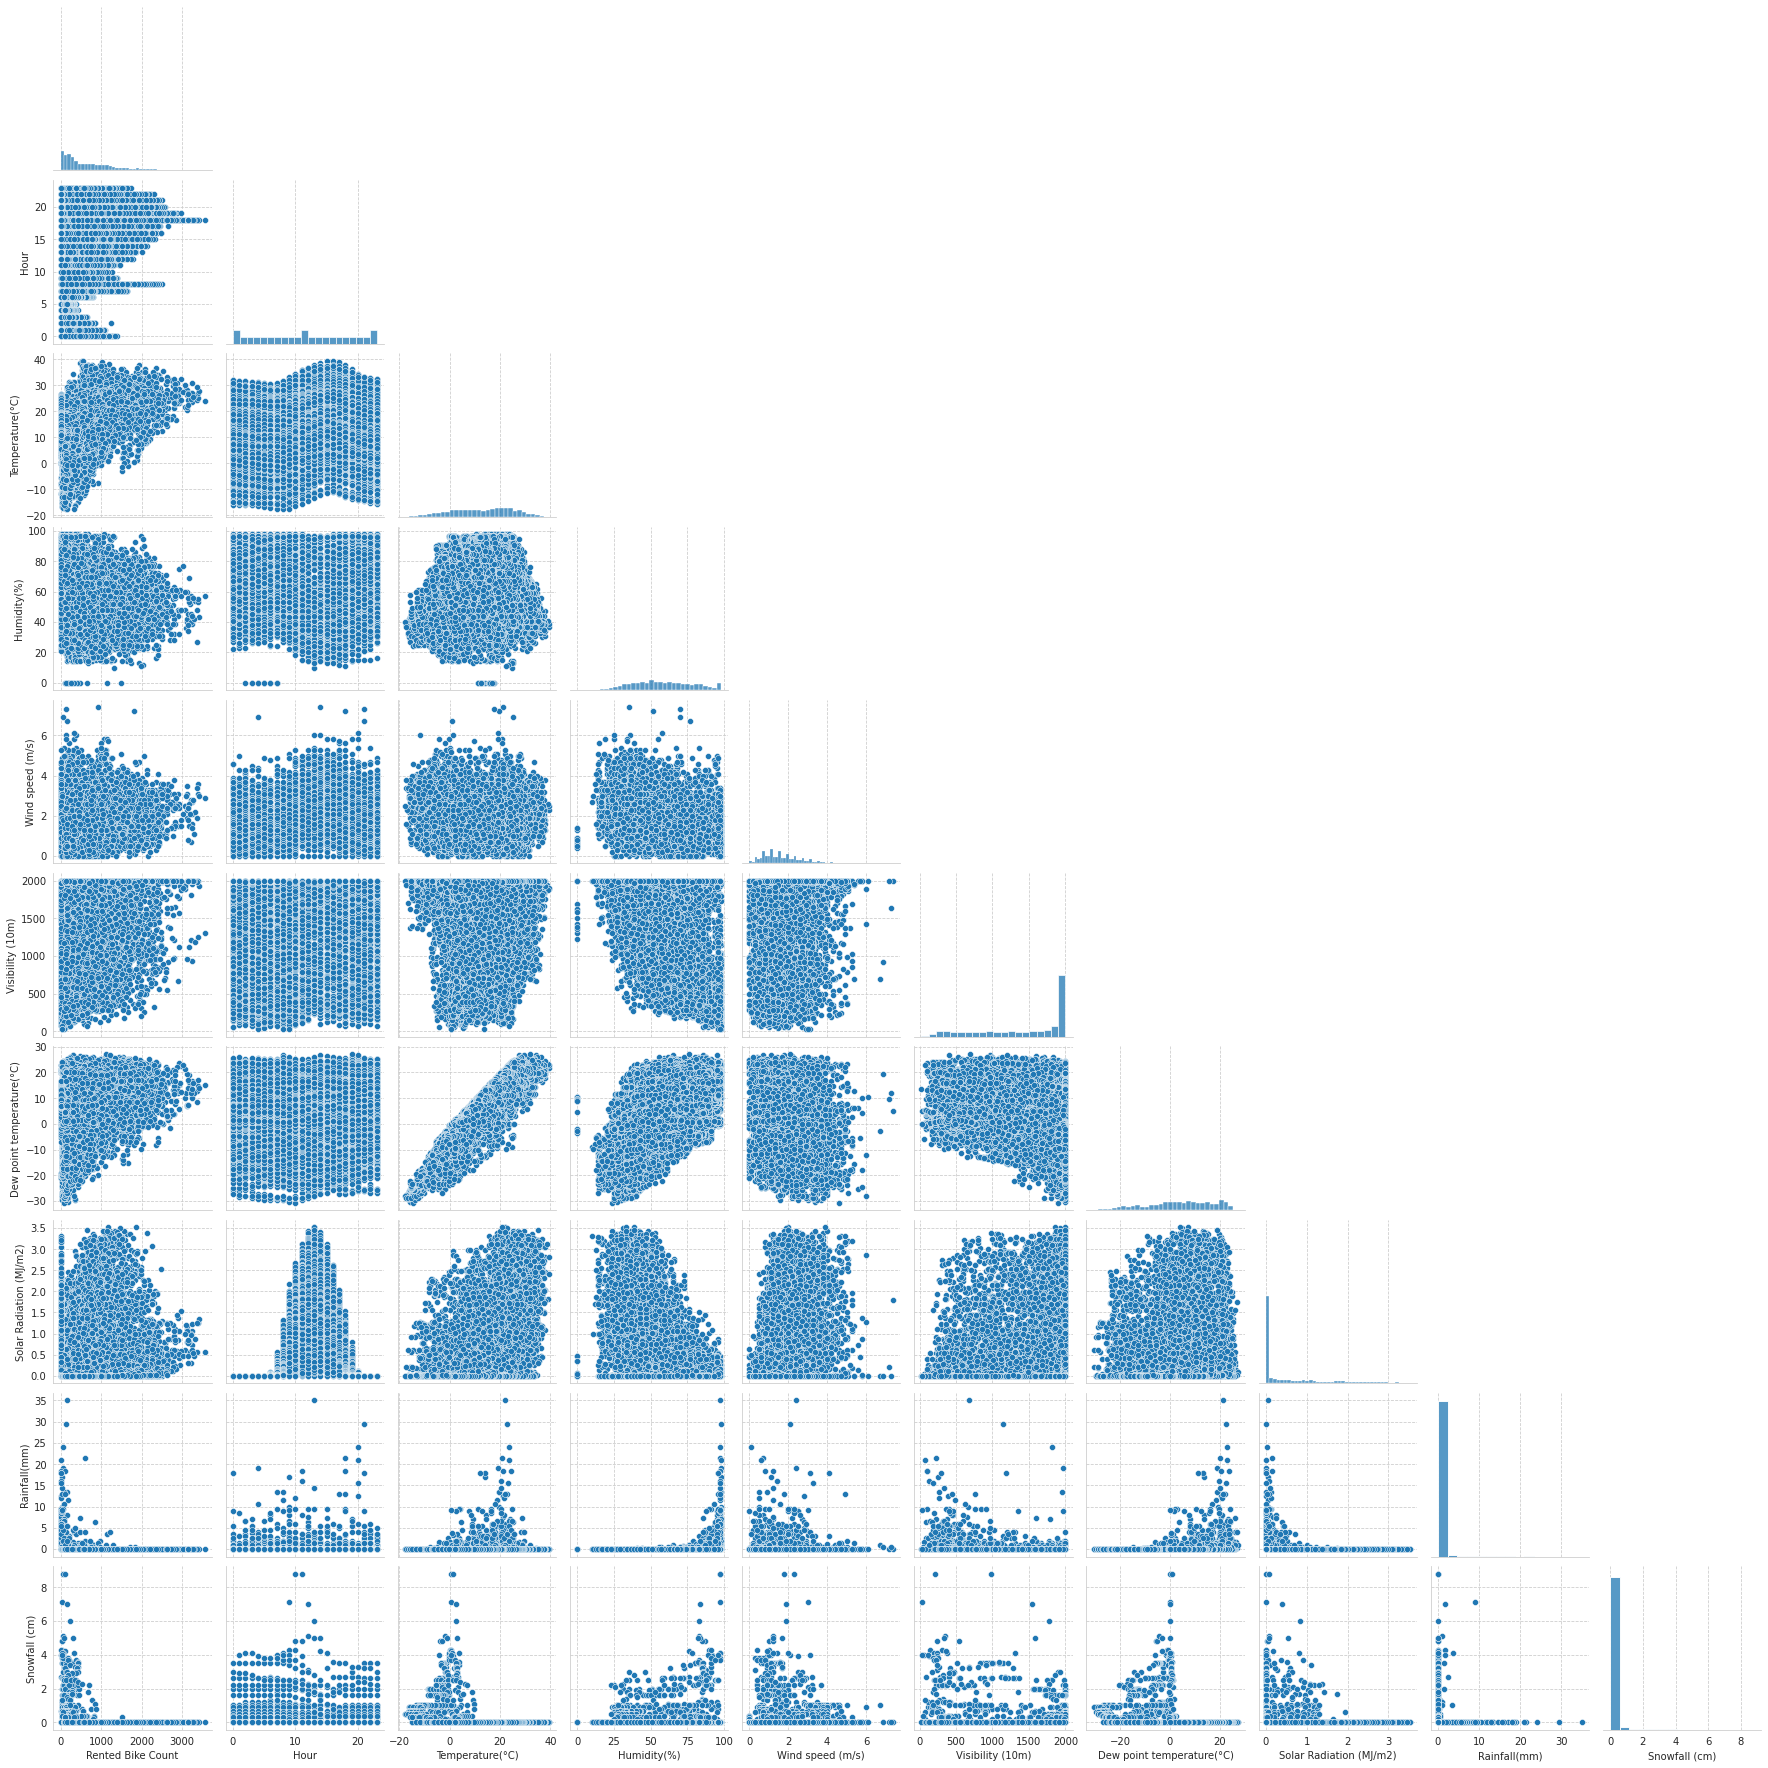

In [28]:
#ploting pairplot for more info
sns.pairplot(seol_bike_df, corner=True)

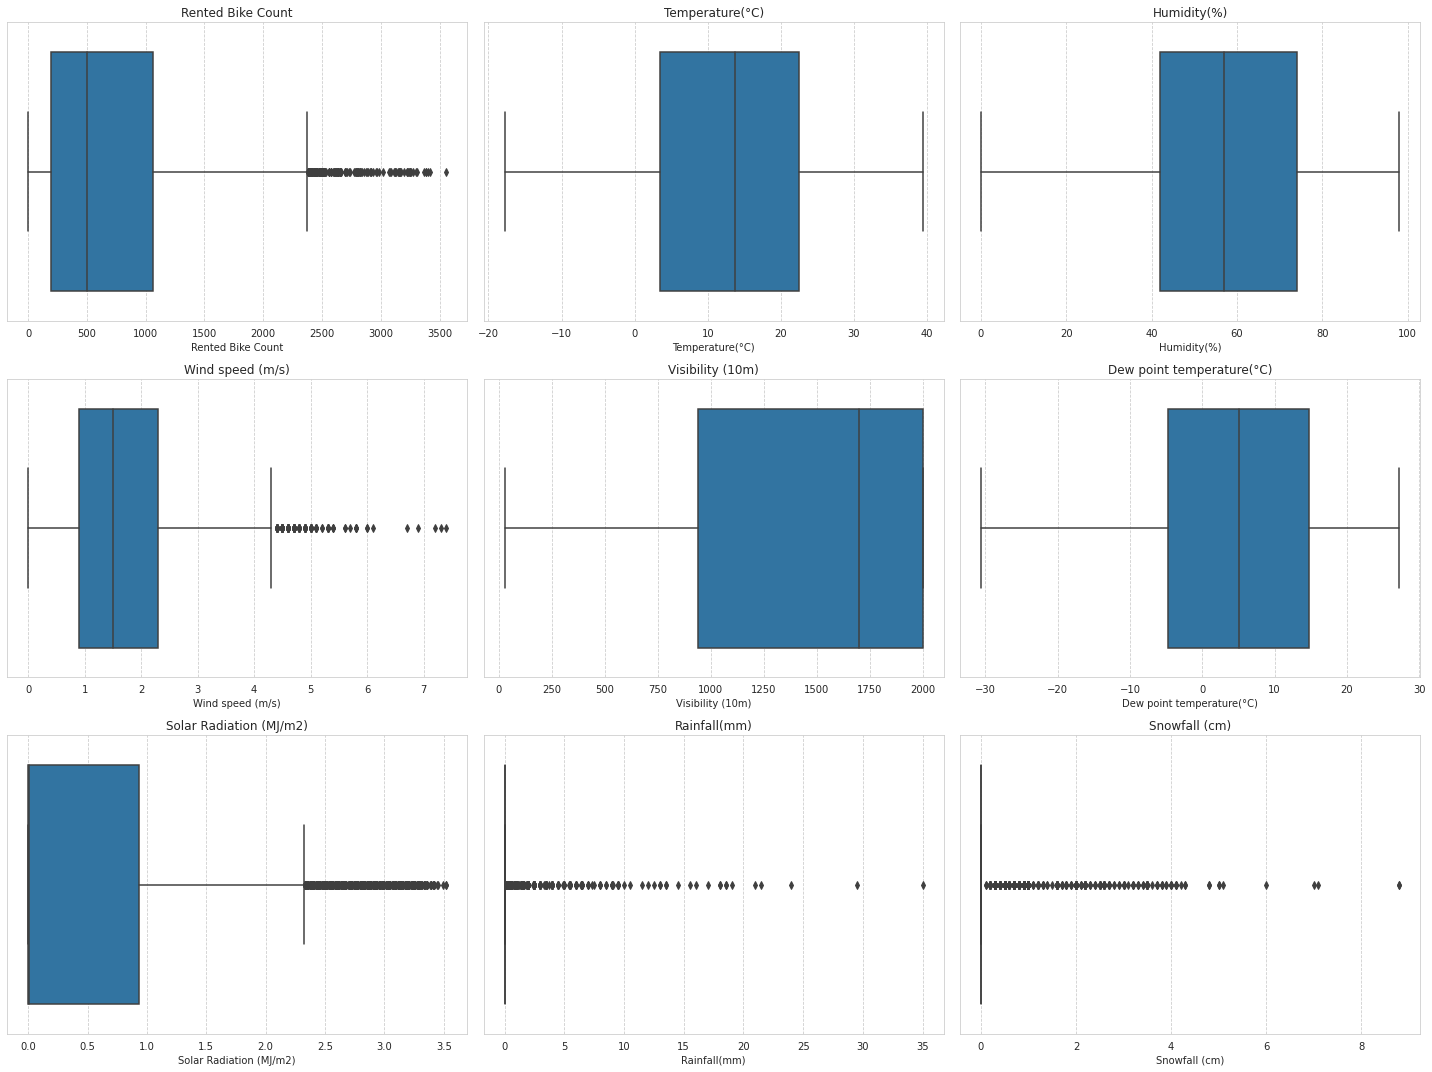

In [29]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(seol_bike_df[i])
  plt.title(i)
  plt.tight_layout()

We don't think of worry about outliers in this data

#Explore our categorical feature and Trying to take some important information from the categorical feature

HOUR Column

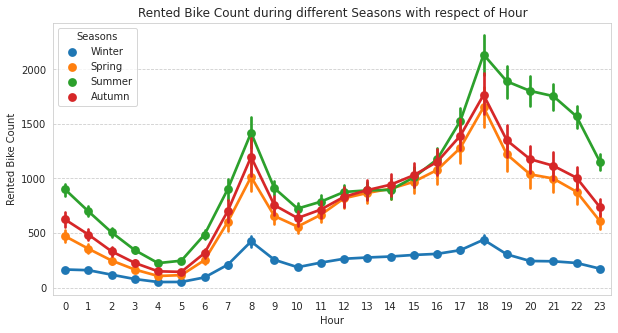

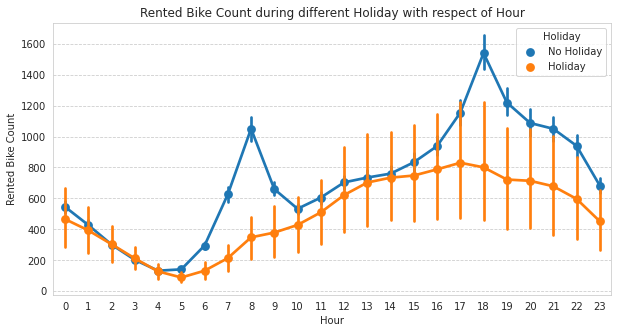

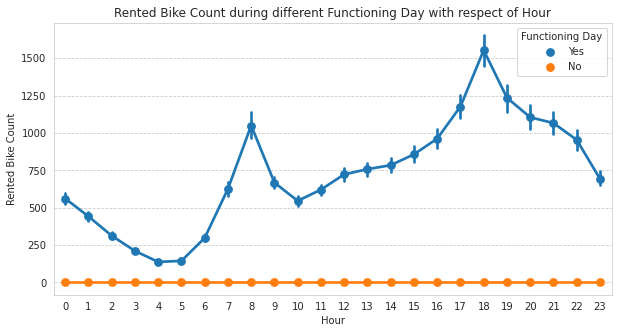

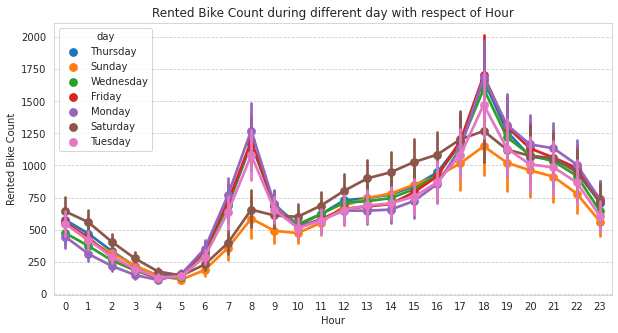

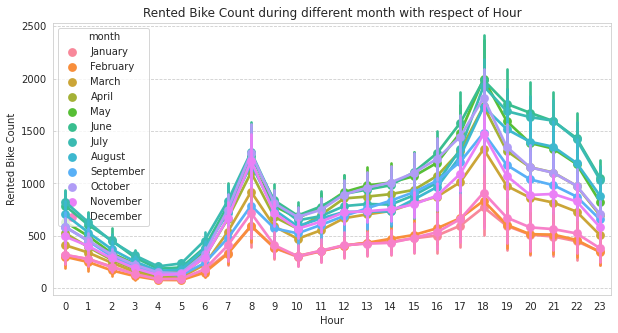

In [30]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(10,5))
    sns.pointplot(x=seol_bike_df["Hour"],y=seol_bike_df['Rented Bike Count'],hue=seol_bike_df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

MONTH Column

[Text(0.5, 1.0, 'Count of Rented bike according to month')]

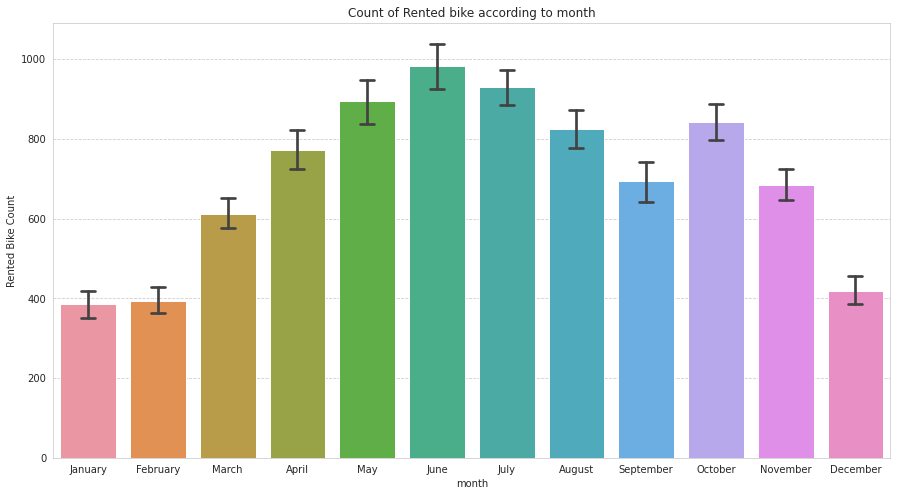

In [31]:
# Analysis of the data based on month
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=seol_bike_df,x='month',y='Rented Bike Count',ax=ax, capsize=0.2)
ax.set(title = 'Count of Rented bike according to month')



*   From the above plot we can clearly say that from the month of may to july the demand of the rented bike is high as compare to other months and these are the month comes under summer season.
*   Rented bike count is highest in the month of june and lowest in the month of
january.

# Some more experiments for our categorical features

In [32]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
seol_bike_df['week'] = seol_bike_df['day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [33]:
# value counts of Week column
seol_bike_df.week.value_counts()

Weekdays    6216
Weekend     2544
Name: week, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

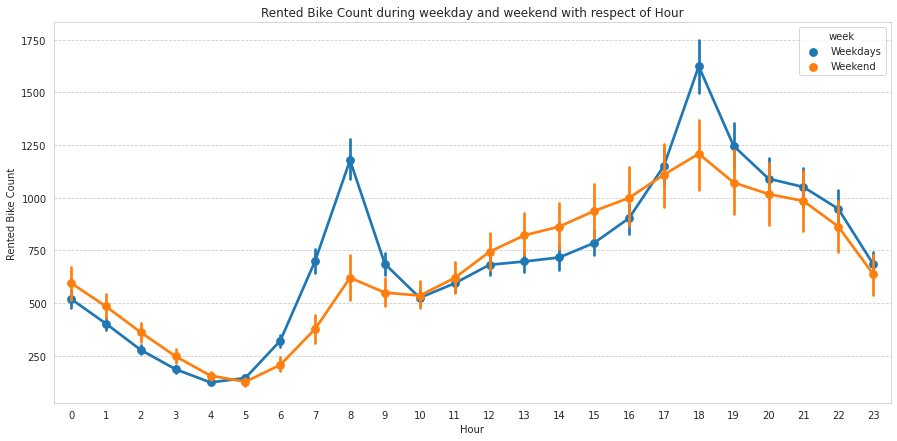

In [34]:
# Getting feel of week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=seol_bike_df["Hour"],y=seol_bike_df['Rented Bike Count'],hue=seol_bike_df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")



*   Blue colour line represent the weekdays and shows that the demand of bike is higher beacause of office hours.
*   Orange colour line represent the weekends which shows that the demand is high in the afternoon on the weekend and very low in the morning.

# Observations

From all these pointplot we have observed a lot from every column like :

**Season** - In the season column, we are able to understand that the demand is low in the winter season.

**Holidays** - In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

**Functioning Day** - In the Functioning Day column, If there is no Functioning Day then there is no demand

**Days of Week** - In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, we can further change this column to weekdays and weekends.

**Month** - In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

**Year** - The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.

## Now we can drop the days of week column

In [35]:
# droping the days of week column from df and from categorical feature 
seol_bike_df.drop(columns=['day'], inplace=True)
categorical_features.drop(columns=['day'], inplace=True)

In [36]:
seol_bike_df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day    month  \
0           0.0            0.0  Winter  No Holiday             Yes  January   
1           0.0            0.0  Winter  No Holiday             Yes  January   
2           0.0            0.0  Winter  No Holiday             Yes  January   
3           0.0            0.0  Winter  No Holiday             Yes  January   
4           0.0            0.0  Winter  No Holiday             Yes  January   

       week  
0  Weekdays  
1  Weekdays  
2  Weekdays  
3  Weekdays  
4  Weekdays

#**Feature Engineering**

Hour column

In [37]:
# defining a function for distribute hour column
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night' 

In [38]:
# apply the hour function
seol_bike_df['Hour'] = seol_bike_df['Hour'].apply(hour)

In [39]:
# value count of Hour 
seol_bike_df['Hour'].value_counts()

Night      2920
Noon       2190
Evening    2190
Morning    1460
Name: Hour, dtype: int64

Value Counts in percentage

In [40]:
for i in categorical_features.columns:
  print('feature name : ',i)
  print(seol_bike_df[i].value_counts(normalize=True))
  print('\n')

feature name :  Hour
Night      0.333333
Noon       0.250000
Evening    0.250000
Morning    0.166667
Name: Hour, dtype: float64


feature name :  Seasons
Spring    0.252055
Summer    0.252055
Autumn    0.249315
Winter    0.246575
Name: Seasons, dtype: float64


feature name :  Holiday
No Holiday    0.950685
Holiday       0.049315
Name: Holiday, dtype: float64


feature name :  Functioning Day
Yes    0.966324
No     0.033676
Name: Functioning Day, dtype: float64


feature name :  month
January      0.084932
March        0.084932
May          0.084932
July         0.084932
August       0.084932
October      0.084932
December     0.084932
April        0.082192
June         0.082192
September    0.082192
November     0.082192
February     0.076712
Name: month, dtype: float64




## Lets take a visualization of value counts



*   Our dependent variable is "Rented Bike Count" so we need to analyse this column with other columns by using some visualisation plot.





====================================================================== Hour ======================================================================




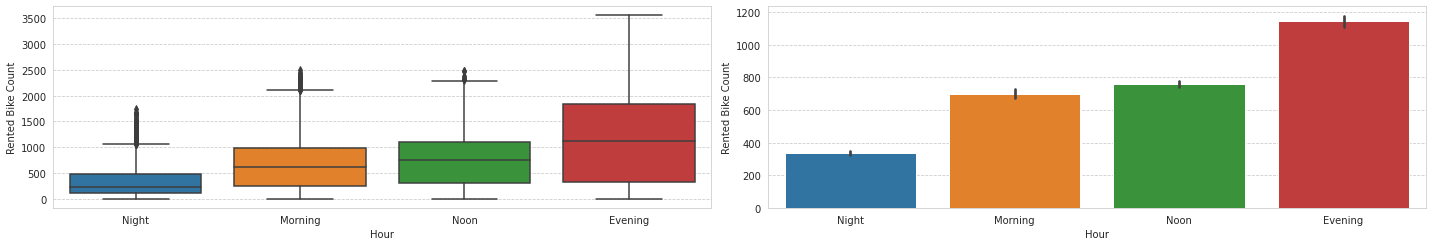



====================================================================== Seasons ======================================================================




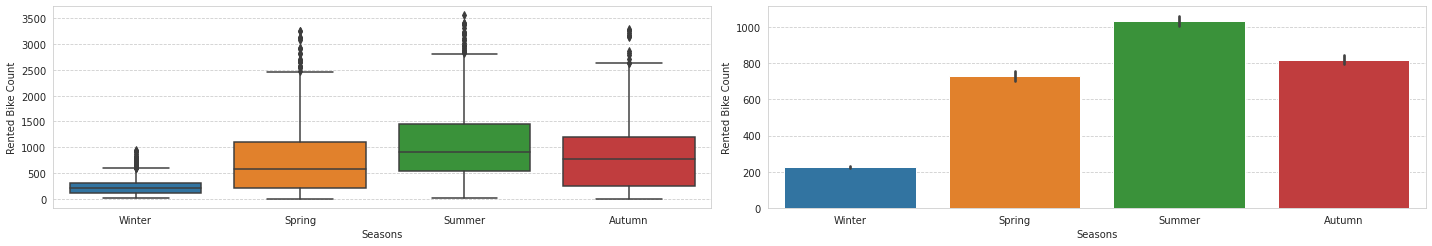



====================================================================== Holiday ======================================================================




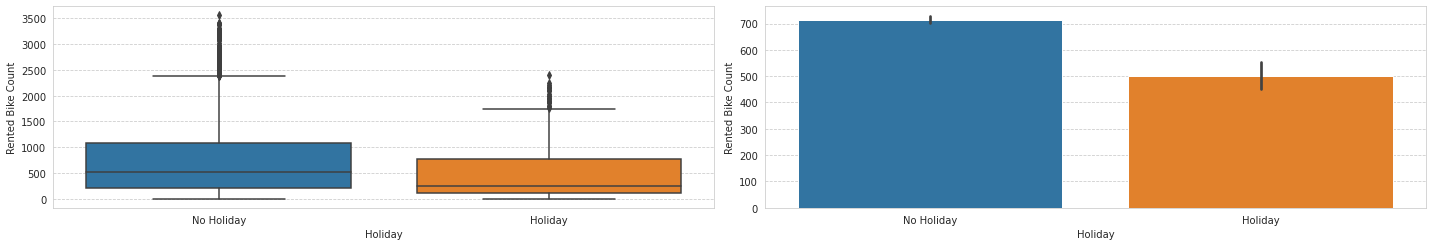



====================================================================== Functioning Day ======================================================================




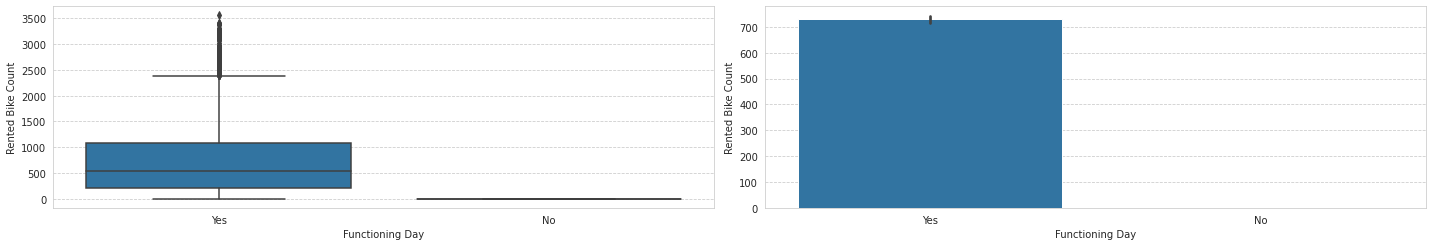



====================================================================== month ======================================================================




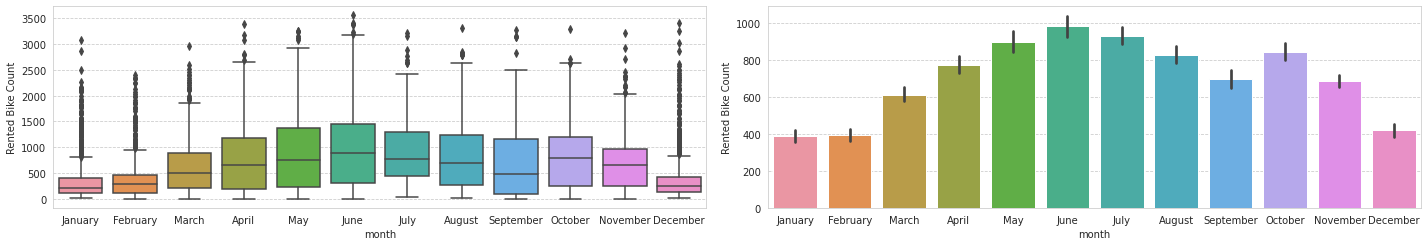

In [41]:
# creating boxplot plot and bar plot
n=1
for i in categorical_features.columns:
  plt.figure(figsize=(20,20))
  plt.subplot(6,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  sns.boxplot(x=seol_bike_df[i],y=seol_bike_df["Rented Bike Count"])
  plt.subplot(6,2,n)
  n+= 1
  sns.barplot(seol_bike_df[i],seol_bike_df['Rented Bike Count'])
  plt.tight_layout()
  plt.show()



*   From the above bar plots we can see that the use of rented bike in funtioning day and shows that peoples dont use rented bike in no funtioning day. 
*   Looking at the holiday column bar plot we can say that as compare to no holiday the more numbers of bike rented in holidays.



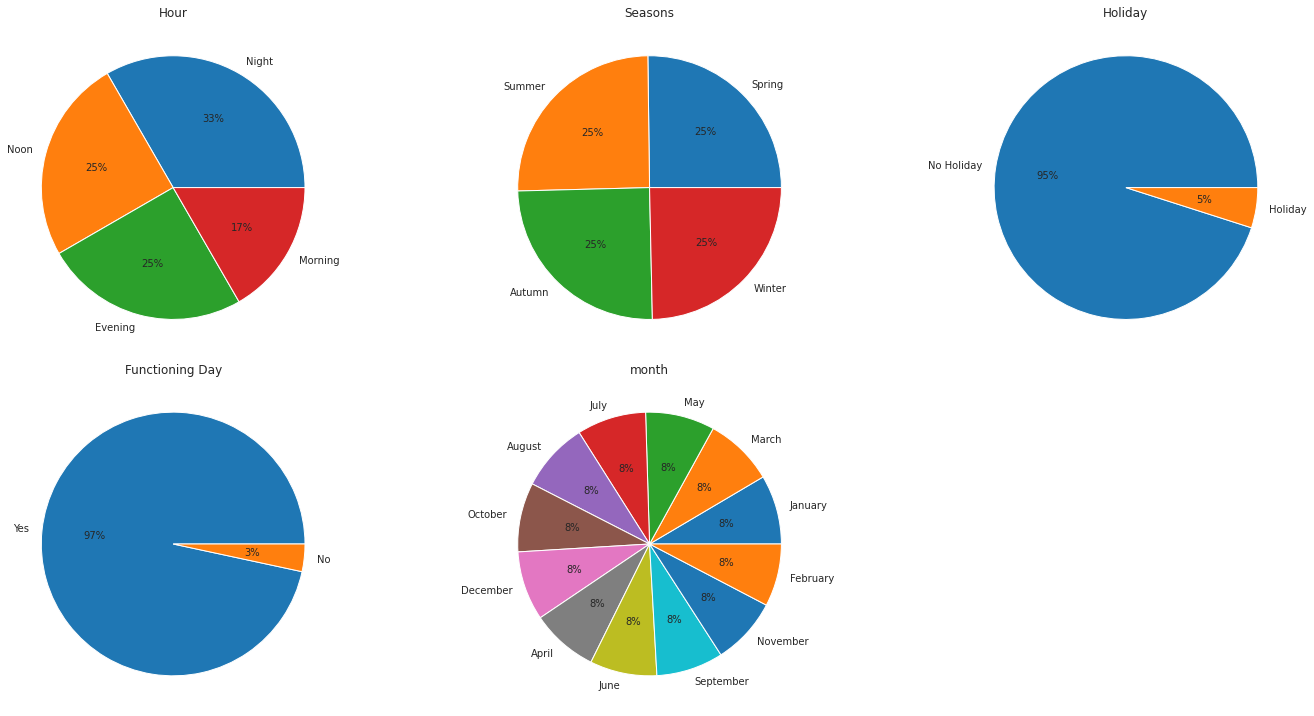

In [42]:
# creating pieplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(seol_bike_df[i].value_counts(),labels = seol_bike_df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

# **Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature**


**Pays little attention to the skewness of our numerical features** - In this plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms.

**Right skewed columns are** - 
Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm).

**Left skewed columns are** - 
Visibility (10m), Dew point temperature(°C)

# **Skewness**

Let's try something else to get information from our Numerical features



====================================================================== Rented Bike Count ======================================================================




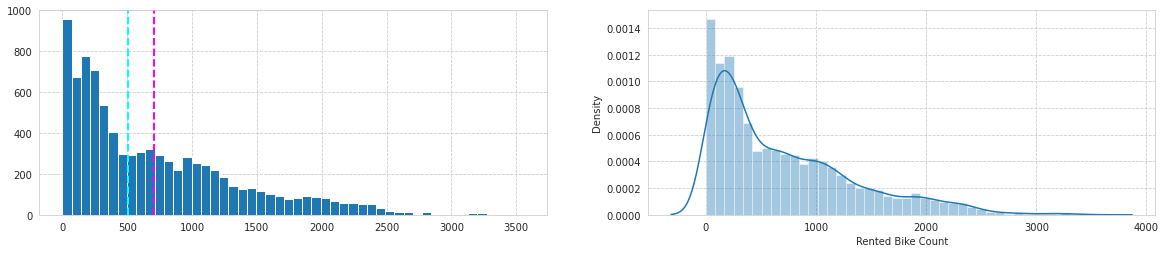



====================================================================== Temperature(°C) ======================================================================




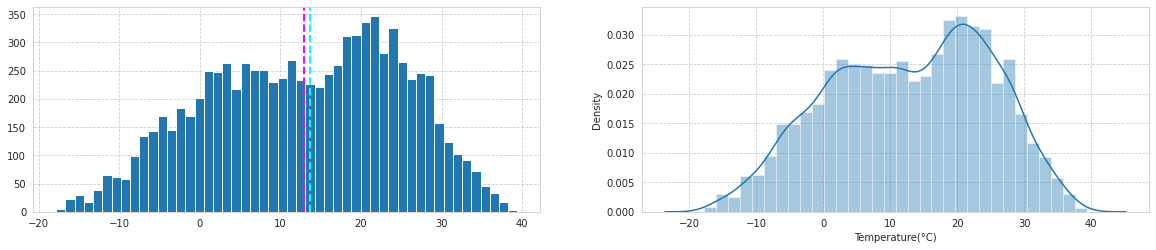



====================================================================== Humidity(%) ======================================================================




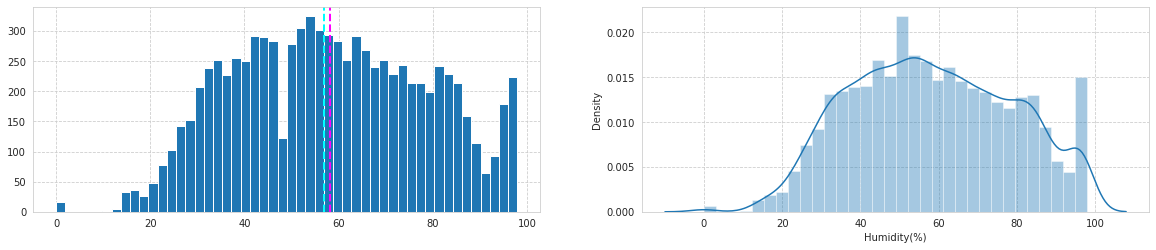



====================================================================== Wind speed (m/s) ======================================================================




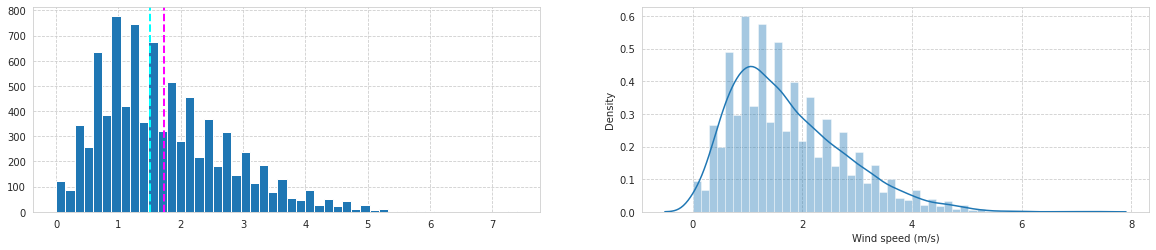



====================================================================== Visibility (10m) ======================================================================




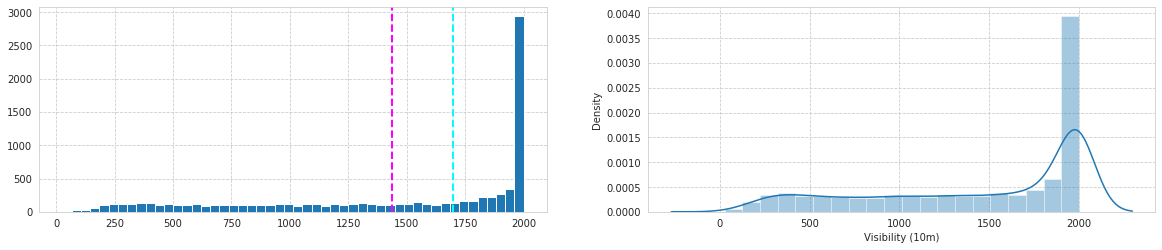



====================================================================== Dew point temperature(°C) ======================================================================




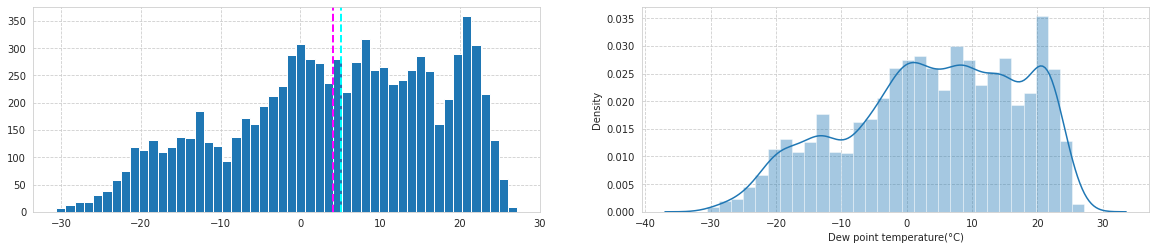



====================================================================== Solar Radiation (MJ/m2) ======================================================================




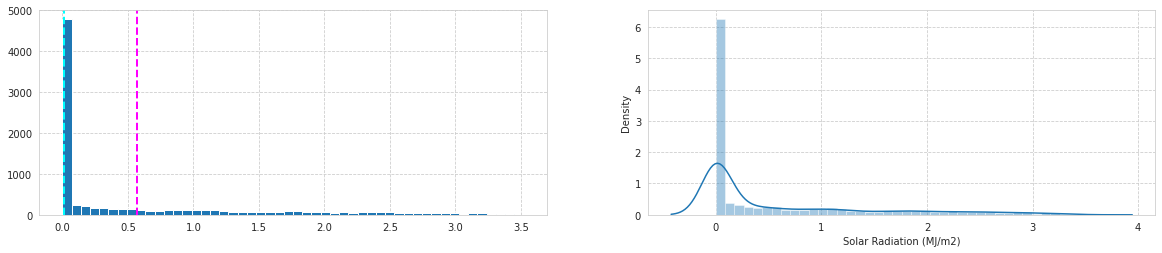



====================================================================== Rainfall(mm) ======================================================================




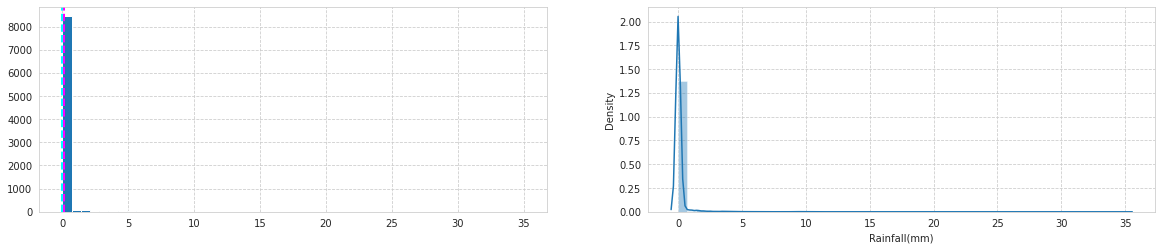



====================================================================== Snowfall (cm) ======================================================================




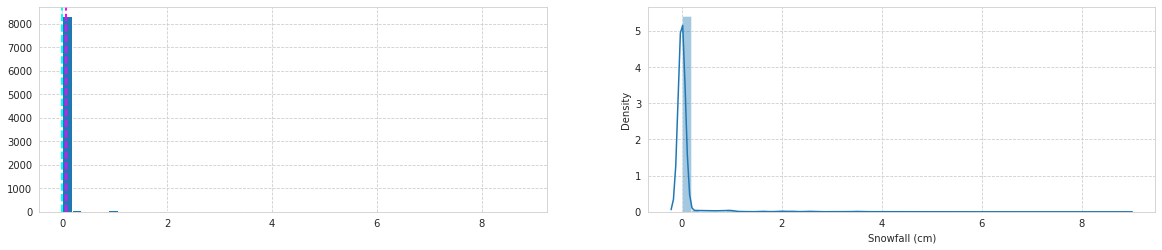

In [43]:
#plotting histogram with mean and median, and distplot of all the numeric features of the dataset
n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  # fig=plt.figure()
  # ax=fig.gca()
  feature=seol_bike_df[i]
  feature.hist(bins=50,)
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(seol_bike_df[i])
  # plt.tight_layout()
  plt.show()


From tha above plots we can conclude that:
1.  People like to ride bikes when it is pretty hot around 20-30 degree celsius. 
2.  The amount of rented bike if more , when there is a solar radiation
3.  People are rented bike specially when there is no rainfall or ver little rainfall.
4. people don't rent bike whenever there is a snowfall.
5. The demand of rented bike increases when it is little windy that means they love to ride in when it is little windy.




**From Histogram we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.**

# **Regression plot**

Lets try to find how is the relation of numerical features with our dependent variable

**Dependent variable** - Rented Bike Count

**Independent variable** - All other variables

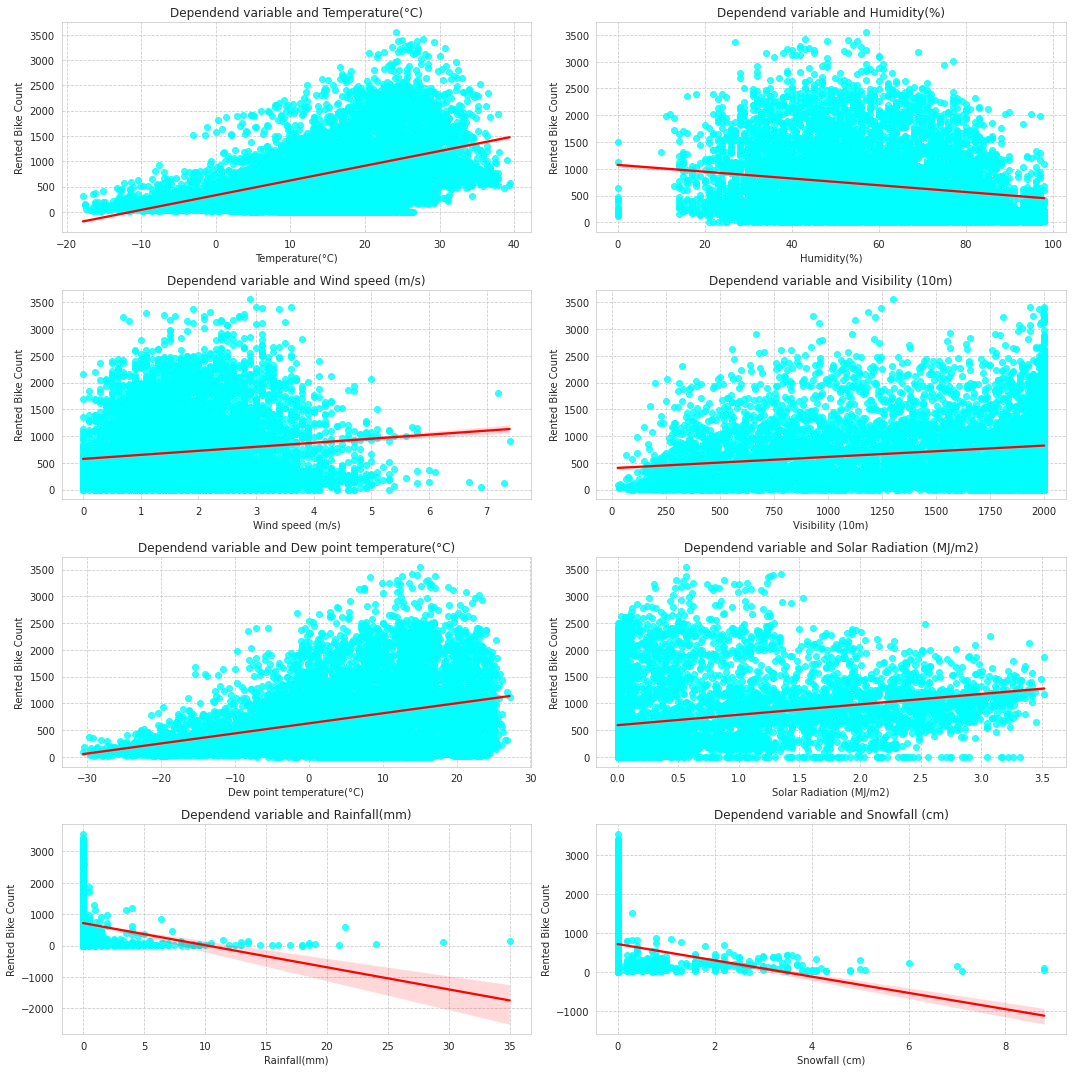

In [44]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(seol_bike_df[i], seol_bike_df['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()



1.   Positively Related - Columns are "Temperature", "Windspeed", "Visibility","Dew point temp", "Solar radiation" .
2.   This means when we increase these features our rented bike count increases.
3.   Negatively Realted - Columns are "Rainfall","Snowfall","Humidity".



**This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable**

**Now is the time to know what is the correlation of our dependent variable with the independent features**

# Correlation check

In [45]:
# Correlation with Rented Bike Count
seol_bike_df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

**As we saw in the regression plot that some features are negatively correlated and some positive, we are seeing the same thing here as well.**

**Let us see the correlation of all the numerical features with the heat map, so that we will also get to know the multilinearity.**

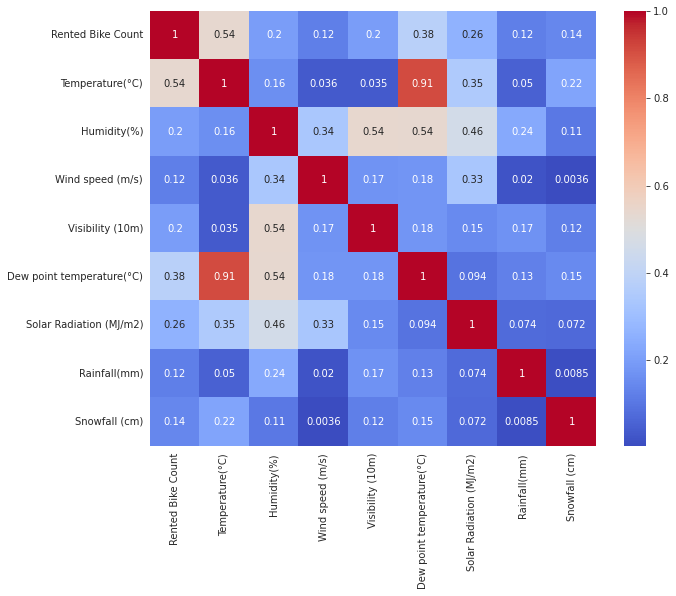

In [46]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(seol_bike_df.corr()), cmap='coolwarm', annot=True)



*   From this graph we are able to see that these temperature(°C) and dev point temperature(°C) column are highly correlated i.e 0.91.
*   We need to drop this column then it will not affect the outcome of our analysis and also having same variation.



In [47]:
# Drop the Dev point temperature column
seol_bike_df.drop(['Dew point temperature(°C)'],axis=1)

Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
0                   254    Night             -5.2           37   
1                   204    Night             -5.5           38   
2                   173    Night             -6.0           39   
3                   107    Night             -6.2           40   
4                    78    Night             -6.0           36   
...                 ...      ...              ...          ...   
8755               1003  Evening              4.2           34   
8756                764  Evening              3.4           37   
8757                694  Evening              2.6           39   
8758                712  Evening              2.1           41   
8759                584    Night              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
0                  2.2              2000                      0.0   
1                  0.8              2000                      0.0   
2                  1.0              2000                      0.0   
3                  0.9              2000                      0.0   
4                  2.3              2000                      0.0   
...                ...               ...                      ...   
8755               2.6              1894                      0.0   
8756               2.3              2000                      0.0   
8757               0.3              1968                      0.0   
8758               1.0              1859                      0.0   
8759               1.3              1909                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0              0.0            0.0  Winter  No Holiday             Yes   
1              0.0            0.0  Winter  No Holiday             Yes   
2              0.0            0.0  Winter  No Holiday             Yes   
3              0.0            0.0  Winter  No Holiday             Yes   
4              0.0            0.0  Winter  No Holiday             Yes   
...            ...            ...     ...         ...             ...   
8755           0.0            0.0  Autumn  No Holiday             Yes   
8756           0.0            0.0  Autumn  No Holiday             Yes   
8757           0.0            0.0  Autumn  No Holiday             Yes   
8758           0.0            0.0  Autumn  No Holiday             Yes   
8759           0.0            0.0  Autumn  No Holiday             Yes   

         month      week  
0      January  Weekdays  
1      January  Weekdays  
2      January  Weekdays  
3      January  Weekdays  
4      January  Weekdays  
...        ...       ...  
8755  November  Weekdays  
8756  November  Weekdays  
8757  November  Weekdays  
8758  November  Weekdays  
8759  November  Weekdays  

[8760 rows x 14 columns]

# Multicollinearity

In [48]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [49]:
calc_vif(seol_bike_df[[i for i in seol_bike_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

# Creating dummy variable

A dataset may contain various type of values, in order to use categorical value for coding effciently we create dummy variables.

ONE HOT ENCODING

In [50]:
new_df=pd.get_dummies(seol_bike_df,drop_first=True,sparse=True)

In [51]:
new_df.head(5)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Hour_Morning  ...  month_February  \
0           0.0            0.0             0  ...               0   
1           0.0            0.0             0  ...               0   
2           0.0            0.0             0  ...               0   
3           0.0            0.0             0  ...               0   
4           0.0            0.0             0  ...               0   

   month_January  month_July  month_June  month_March  month_May  \
0              1           0           0            0          0   
1              1           0           0            0          0   
2              1           0           0            0          0   
3              1           0           0            0          0   
4              1           0           0            0          0   

   month_November  month_October  month_September  week_Weekend  
0               0              0                0             0  
1               0              0                0             0  
2               0              0                0             0  
3               0              0                0             0  
4               0              0                0             0  

[5 rows x 29 columns]

# **Normalization** 

**We saw that our dependent variable is right skewed, it needs to be normalized.**

We do some experiments to normalize it

Text(0.5, 1.0, 'Square root')

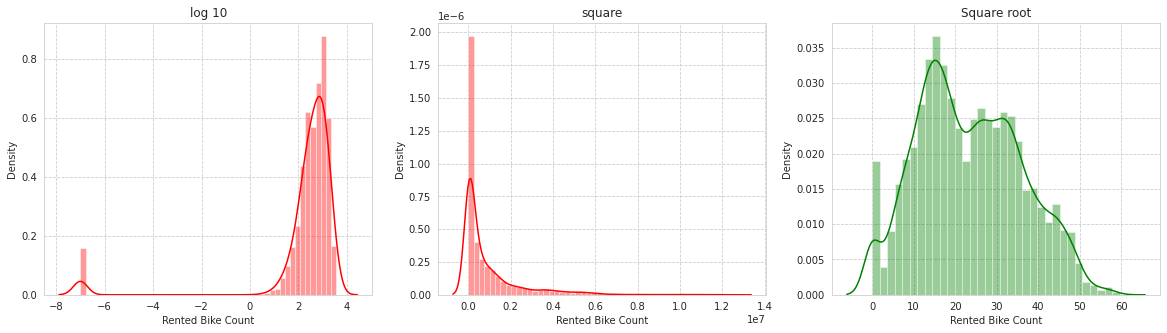

In [52]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10 
sns.distplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
# here we use square 
sns.distplot((new_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
# here we use square root 
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

**Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable**


# **Model Training**

# Train and Test Split 

Geeting Feel of my X_train, X_test, y_train, y_test

In [53]:
# Divide data in dependent feature and Independent feature

X = new_df.drop(columns=['Rented Bike Count','Dew point temperature(°C)'])
y = np.sqrt(new_df['Rented Bike Count'])

In [54]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=0)

In [55]:
X_train.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
8639              3.8           83               1.1               390   
3614             24.0           47               2.3               520   
1387             -7.1           33               2.0              1887   
3900             12.3           97               0.8               238   
8044              3.6           70               0.8              1934   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_Morning  \
8639                     0.00           0.0            0.4             0   
3614                     2.87           0.0            0.0             0   
1387                     0.00           0.0            0.0             0   
3900                     0.14           2.0            0.0             0   
8044                     0.00           0.0            0.0             0   

      Hour_Night  Hour_Noon  ...  month_February  month_January  month_July  \
8639           1          0  ...               0              0           0   
3614           0          1  ...               0              0           0   
1387           0          0  ...               0              1           0   
3900           0          1  ...               0              0           0   
8044           1          0  ...               0              1           0   

      month_June  month_March  month_May  month_November  month_October  \
8639           0            0          0               1              0   
3614           0            0          0               0              0   
1387           0            0          0               0              0   
3900           0            0          0               0              0   
8044           0            0          0               0              0   

      month_September  week_Weekend  
8639                0             1  
3614                0             0  
1387                0             1  
3900                0             0  
8044                0             0  

[5 rows x 27 columns]

In [56]:
X_test.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
4059             10.7           73               1.3              2000   
6914             21.7           78               1.0              2000   
233               3.6           65               4.3              1061   
982              -9.7           51               2.8              2000   
5967             33.6           58               3.6              1448   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_Morning  \
4059                     0.00           0.0            0.0             0   
6914                     0.00           0.0            0.0             0   
233                      0.03           0.0            0.4             0   
982                      0.00           0.0            0.0             0   
5967                     1.98           0.0            0.0             0   

      Hour_Night  Hour_Noon  ...  month_February  month_January  month_July  \
4059           1          0  ...               0              0           0   
6914           1          0  ...               0              0           0   
233            0          0  ...               0              0           0   
982            0          0  ...               0              0           0   
5967           0          1  ...               0              0           0   

      month_June  month_March  month_May  month_November  month_October  \
4059           0            0          1               0              0   
6914           0            0          0               0              0   
233            0            0          0               0              1   
982            0            0          0               0              1   
5967           1            0          0               0              0   

      month_September  week_Weekend  
4059                0             1  
6914                1             1  
233                 0             0  
982                 0             0  
5967                0             0  

[5 rows x 27 columns]

In [57]:
y_train.head()

8639    19.467922
3614    32.480764
1387    11.045361
3900     3.316625
8044    12.124356
Name: Rented Bike Count, dtype: float64

In [58]:
y_test.head()

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
Name: Rented Bike Count, dtype: float64

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 27), (2190, 27), (6570,), (2190,))

# **Evaluation Metrics**

**Defining a function to train and evaluate the model with Diffrent parameters like MSE , RMSE, R2 Score, Best_params, Best score, Coefficient , intercept and feature importance**

In [60]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model
    
  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any 
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass
    

  #predicting the Test set and evaluting the models 

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')
  
  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score
    
    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:
      
      # ploting the graph of feature importance
      
      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
    
    except:
      pass
  
  # Here we appending the parameters for all models 
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values  
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

# transforming X_train and X_test with yeo-johnson transformation

In [61]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo = PowerTransformer()
X_train_trans = yeo.fit_transform(X_train) # fit transform the training set
X_test_trans = yeo.transform(X_test) #tranform the test set

# **Linear Regression**

In [62]:
# imporing linear models
from sklearn.linear_model import LinearRegression,Lasso,Ridge

Training score  = 0.735785401914751
MAE : 5.116849064645175
MSE : 42.37900152515978
RMSE : 6.509915631185997
R2 : 0.7317214253932691
Adjusted R2 :  0.7283710454143693 

********************************************************************************
coefficient 
 [ 5.9305513  -1.76661946  0.08752741  0.447327    0.77341307 -3.16752215
  0.10598605 -1.81385902 -5.09201592 -3.63193105 -0.94310196 -1.42879488
 -2.72023135  0.57960043  4.93284207 -0.35449365  0.22966631 -0.27222294
 -0.10875753 -0.33139836  1.03486595 -0.18315969  0.32618536  0.12574518
  0.39611768 -0.00744012 -0.39100665]


Intercept  =  23.534127039443135


******************** ploting the graph of Actual and predicted only with 80 observation ********************


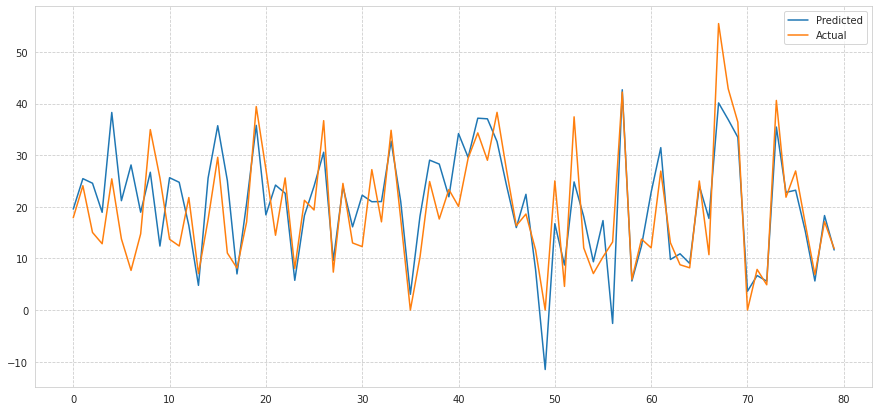

In [63]:
# importing Fitting the linear regression model with our score matrix function 
LR_df = score_metrix(LinearRegression(),X_train_trans,X_test_trans,y_train,y_test)

# **Regularization**

### Lasso with hyperparameter tuning

In [64]:
# importing Lasso from sklearn
from sklearn.linear_model import Lasso

In [65]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

Training score  = 0.7357847618484226
The best parameters found out to be :{'alpha': 0.0014} 
where model best score is:  0.7328041291455849 

MAE : 5.117330924448859
MSE : 42.383333335396586
RMSE : 6.510248331315526
R2 : 0.7316940030417749
Adjusted R2 :  0.7283432806005761 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


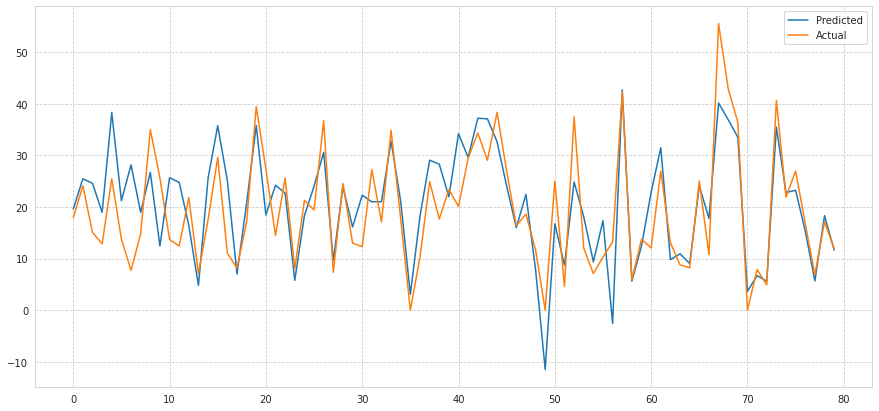

In [66]:
# fit and evaluate model with score_matrix function
score_metrix(lasso_cv,X_train_trans,X_test_trans,y_train,y_test)

Here our r2 score 0.72 and model capture moderate level of data variance. We need to improve r2 score.

#**Ridge with hyperparameter tuning**

In [67]:
# # importing Lasso from sklearn
from sklearn.linear_model import Ridge

Training score  = 0.7357805262532306
The best parameters found out to be :{'alpha': 10} 
where model best score is:  0.7328052265539069 

MAE : 5.117691404250719
MSE : 42.377256501662885
RMSE : 6.509781601687025
R2 : 0.7317324721947405
Adjusted R2 :  0.7283822301731206 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


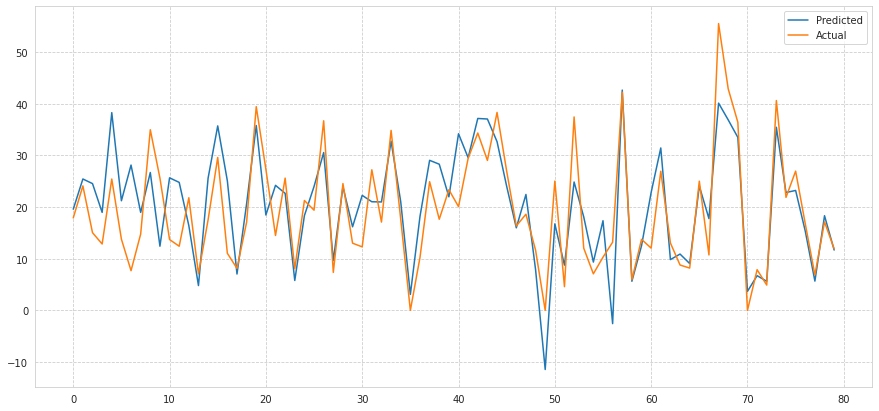

In [68]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters 
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,X_train_trans,X_test_trans,y_train,y_test) # fit and evaluate model with score_matrix function

Looks like our r2 score value is 0.72 that means our model is captured moderate level of the data variance. Lets save it in dataframe for later comparisons.

# Polynomial

In [69]:
# importing polynominal features from sklearn
from sklearn.preprocessing import PolynomialFeatures

In [70]:
poly = PolynomialFeatures(2) #creating variable with degree 2
poly_X_train = poly.fit_transform(X_train_trans) # fit the train set
poly_X_test = poly.transform(X_test_trans) #transform the test set

Training score  = 0.8507431734716101
MAE : 3.7697205340679387
MSE : 25.507954491944442
RMSE : 5.050540019833963
R2 : 0.8385229140387017
Adjusted R2 :  0.8017535944087033 

********************************************************************************
coefficient 
 [ 2.47964570e+08  3.85241096e+00 -2.09827428e+00  1.33018934e-01
  3.40237631e-01  4.77618092e-01  3.08919818e+00  4.04796960e+11
  1.95411522e+11  4.16356329e+11 -5.28802353e+11 -4.34450879e+11
  3.91886667e+09 -4.63324011e+11 -2.14884146e+11  6.19090905e+11
 -2.50886089e+10  3.93043880e+11  9.66900838e+10  1.57071526e+11
  7.11358969e+10 -6.70737661e+10  5.90989837e+11 -2.59924021e+11
 -5.34230550e+11 -8.40859764e+10 -4.60071892e+10 -1.43980370e+11
 -3.08981310e+00  1.56048004e-02 -5.26124511e-02  3.42305892e-01
  3.68209457e-01 -3.51066589e-01 -1.06182861e+00 -2.62819862e+00
 -1.57553291e+00 -1.38418961e+00 -2.09579468e-01 -1.94746399e+00
 -4.36093140e+00 -1.26664352e+00  2.27663422e+00 -1.05264282e+00
 -1.50477600e+00 -

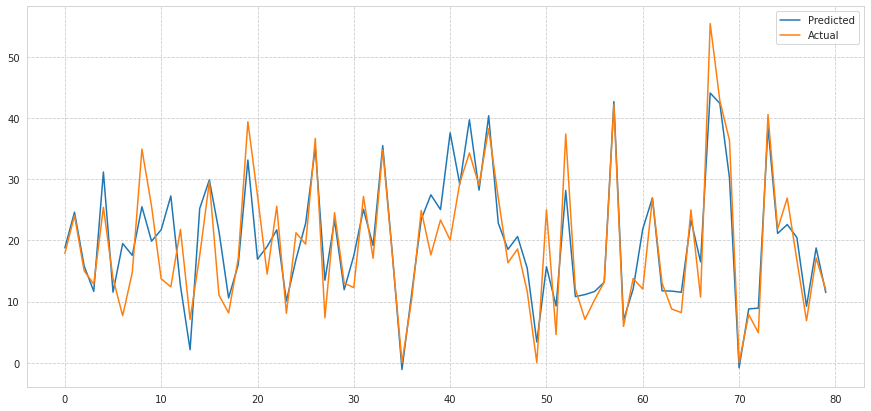

In [71]:
# fit and evaluate model with score_matrix function
score_metrix(LinearRegression(), poly_X_train,poly_X_test,y_train,y_test)

# Train Test split for Tree Base Models
because multicollinearty not effect tree base models

In [72]:
# Split data in X and Y
new_X = new_df.drop(columns='Rented Bike Count')
new_y = new_df['Rented Bike Count']

In [73]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(new_X,new_y, test_size=0.25,random_state=42)

In [74]:
# Scalling data with yeo-johnson
scaler = PowerTransformer()

In [75]:
X_train  = scaler.fit_transform(X_train) #fitting the X_train
X_test  = scaler.transform(X_test) # transform test set

# Decission Tree
Using Grid Search CV for hyperparameter tuning and try to find best parameters

In [76]:
# imporing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [77]:
# Parameters for Decission Tree model
param_grid = {'criterion' : ["mse"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,20,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [78]:

# Using Grid Search 
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)

Training score  = 0.8584036456061928
The best parameters found out to be :{'criterion': 'mse', 'max_depth': 20, 'max_features': 24, 'min_samples_split': 50, 'splitter': 'best'} 
where model best score is:  0.7699843236656788 

MAE : 196.11124081167992
MSE : 94761.63652098423
RMSE : 307.8337806690231
R2 : 0.768422754556056
Adjusted R2 :  0.7654222164383186 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


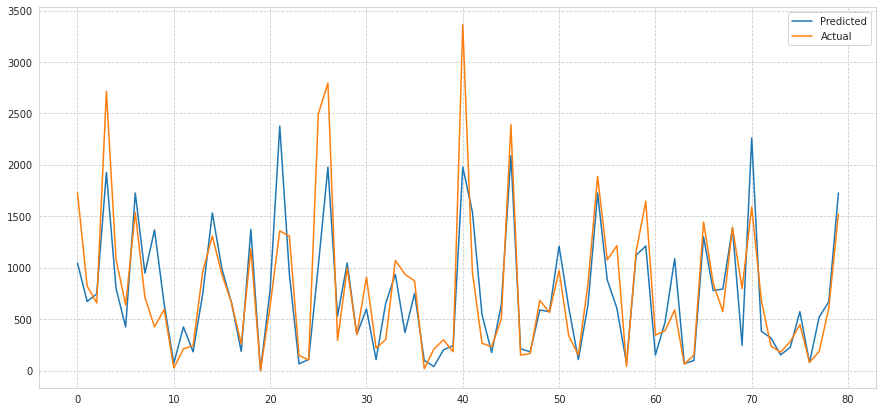

In [79]:
# fit and evaluate model with score_matrix function
score_metrix(Dt_grid_search,X_train,X_test,y_train,y_test)

# RandomForest Regression

In [80]:
# Importing Randomfroest from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [81]:
# parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [82]:
# Using Grid SearchCV 
Random_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Training score  = 0.9462731636045654
The best parameters found out to be :{'max_depth': 20, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150} 
where model best score is:  0.8369609716536994 

MAE : 168.45862436509654
MSE : 68649.67052536242
RMSE : 262.01082138980905
R2 : 0.8322348348492555
Adjusted R2 :  0.8300611075821474 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


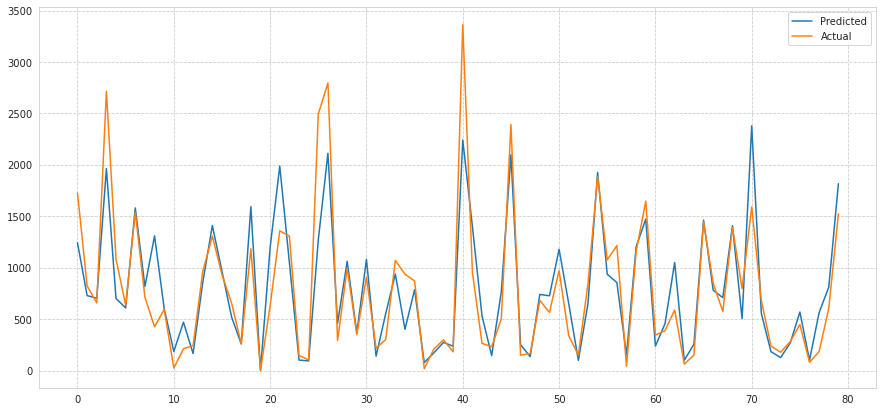

In [84]:
# fit and evaluate model with score_matrix function
score_metrix(Random_forest_Grid_search,X_train,X_test,y_train,y_test)

# Gradient Boosting Regressor

In [85]:
# Importing Gradient Boosting Regressor from sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor 

In [86]:
# parameters for Gradient Boosting Regressor
param_grid = {'learning_rate':[0.15,0.1,0.05,0.02,0.20],
              'n_estimators':[100,150,200,250],
              'max_depth':[2,4,6,10]}

In [87]:
# Using grid search 
gradient_boost_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, n_jobs=-1, verbose=2)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Training score  = 0.9935643479966888
The best parameters found out to be :{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 250} 
where model best score is:  0.8442255135171225 

MAE : 163.98523306848028
MSE : 65950.91794576266
RMSE : 256.8091079883318
R2 : 0.8388300110351381
Adjusted R2 :  0.8367417372308733 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


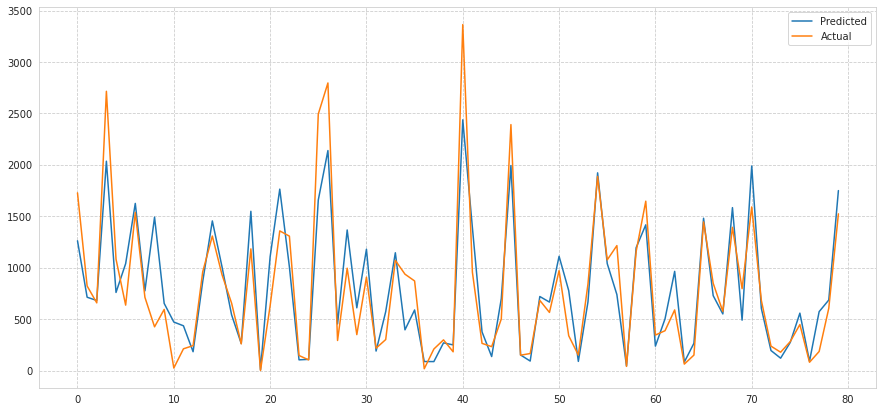

In [88]:
# fit and evaluate model with score_matrix function
score_metrix(gradient_boost_grid_search,X_train,X_test,y_train,y_test)

# Adaboost Regressor

In [89]:
# Importing Ada Boost Regressor from sklearn.ensemble
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# parameters for Ada Boost Regressor
param_grid = {'n_estimators': [50,100,150,200],
          'learning_rate':[0.5,1,1.5,2],
          'base_estimator': [LinearRegression(),DecisionTreeRegressor()]}
          

In [ ]:
#creating Ada boost grid model
Ada_boost_grid_search = GridSearchCV(AdaBoostRegressor(),param_grid=param_grid,n_jobs=-1)

Training score  = 0.9978192324116472
The best parameters found out to be :{'base_estimator': DecisionTreeRegressor(), 'learning_rate': 1.5, 'n_estimators': 200} 
where model best score is:  0.8420424842881655 

MAE : 165.8365296803653
MSE : 72034.73698630137
RMSE : 268.39287804690605
R2 : 0.8239624537945517
Adjusted R2 :  0.8216815415808763 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


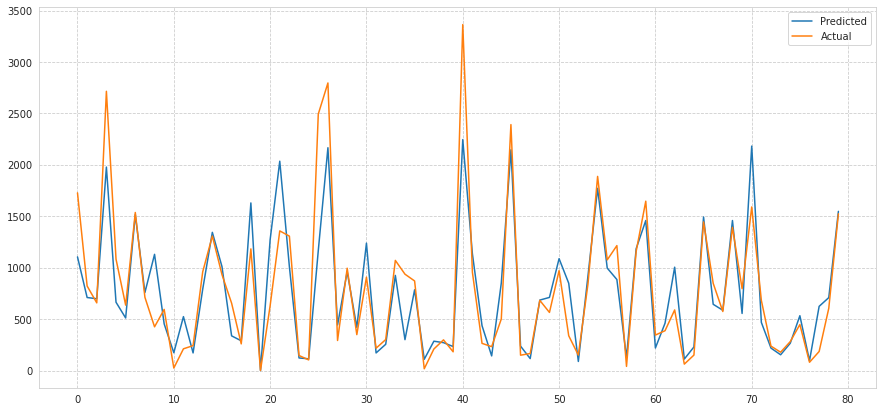

In [ ]:
# fit and evaluate model with score_matrix function
score_metrix(Ada_boost_grid_search,X_train,X_test,y_train,y_test)

# XGBoost Regression

In [ ]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:

params = {'learning_rate':[0.5,1,1.5,2],'n_estimators':[80,100,150],'max_depth':[15,20,30]}

In [ ]:
#creating xgb grid model
xgb_grid_search= GridSearchCV(XGBRegressor(),param_grid=params,)

[14:28:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

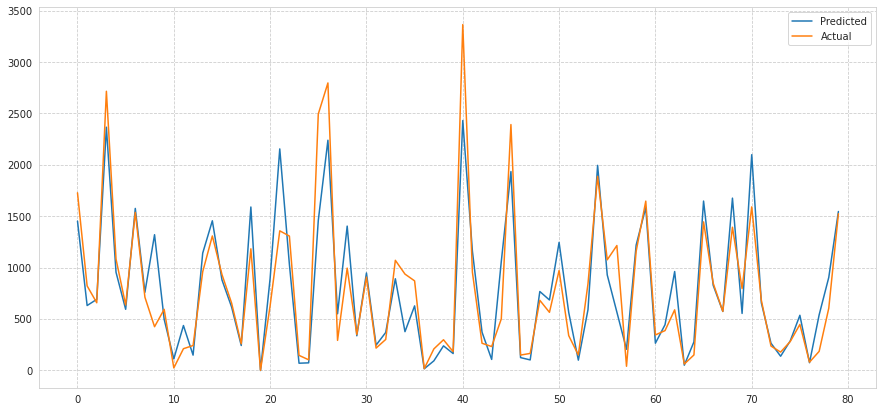

In [ ]:
score_metrix(xgb_grid_search,X_train,X_test,y_train,y_test)

# Creating Data Frame of all Evaluation Matrix with respect of models

In [ ]:
#creating dictionary to store all the metrices 
all_matrices={'Mean_Absolute_error':mean_absolut_error,'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'Training_score':training_score,'R2':r2_list,'Adjusted_R2':adj_r2_list}


In [ ]:
#list of all model name 
model_name=['Linear','Lasso','Ridge','Polynomial','Decision_Tree','Random_Forest','Gradient_Boosting','Ada_Boost','XG_Boost']

In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_matrices,orient='index',columns=model_name)

In [ ]:
matrices_df

Linear      Lasso      Ridge  Polynomial  \
Mean_Absolute_error      5.116849   5.117331   5.117691    3.769721   
Mean_square_error       42.379002  42.383333  42.377257   25.507954   
Root_Mean_square_error   6.509916   6.510248   6.509782    5.050540   
Training_score           0.735785   0.735785   0.735781    0.850743   
R2                       0.731721   0.731694   0.731732    0.838523   
Adjusted_R2              0.728371   0.728343   0.728382    0.801754   

                        Decision_Tree  Random_Forest  Gradient_Boosting  \
Mean_Absolute_error        201.287327     167.545580         163.129247   
Mean_square_error        93360.574771   68271.492617       65527.401576   
Root_Mean_square_error     305.549627     261.288141         255.983206   
Training_score               0.825517       0.946420           0.991009   
R2                           0.771847       0.833159           0.839865   
Adjusted_R2                  0.768890       0.830997           0.837790   

                           Ada_Boost      XG_Boost  
Mean_Absolute_error       165.836530    175.609231  
Mean_square_error       72034.736986  79998.344821  
Root_Mean_square_error    268.392878    282.839786  
Training_score              0.997819      1.000000  
R2                          0.823962      0.804501  
Adjusted_R2                 0.821682      0.801968

In [ ]:
matrices_df=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
matrices_df

Models  Mean_Absolute_error  Mean_square_error  \
0             Linear             5.116849          42.379002   
1              Lasso             5.117331          42.383333   
2              Ridge             5.117691          42.377257   
3         Polynomial             3.769721          25.507954   
4      Decision_Tree           201.287327       93360.574771   
5      Random_Forest           167.545580       68271.492617   
6  Gradient_Boosting           163.129247       65527.401576   
7          Ada_Boost           165.836530       72034.736986   
8           XG_Boost           175.609231       79998.344821   

   Root_Mean_square_error  Training_score        R2  Adjusted_R2  
0                6.509916        0.735785  0.731721     0.728371  
1                6.510248        0.735785  0.731694     0.728343  
2                6.509782        0.735781  0.731732     0.728382  
3                5.050540        0.850743  0.838523     0.801754  
4              305.549627        0.825517  0.771847     0.768890  
5              261.288141        0.946420  0.833159     0.830997  
6              255.983206        0.991009  0.839865     0.837790  
7              268.392878        0.997819  0.823962     0.821682  
8              282.839786        1.000000  0.804501     0.801968

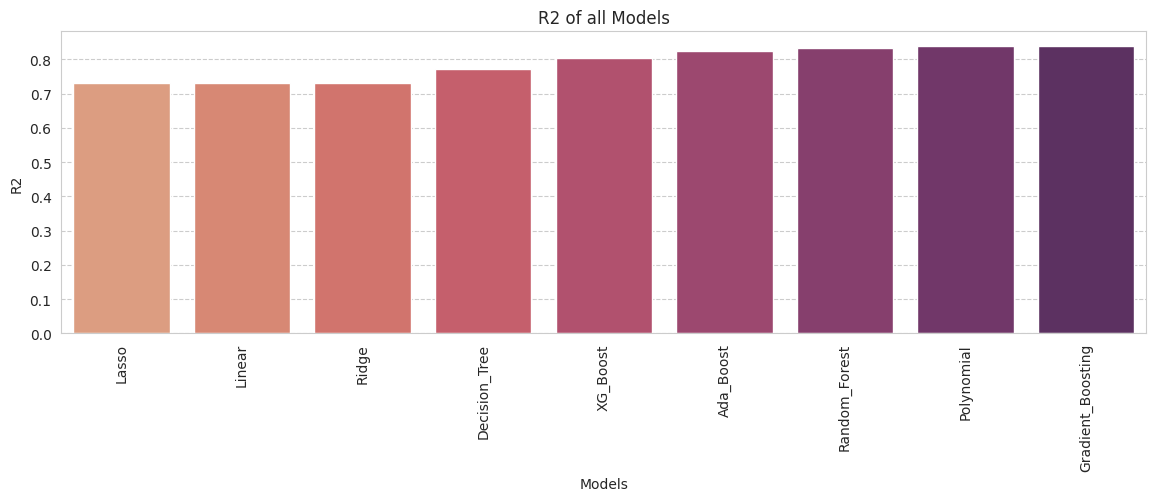

In [ ]:
#creating bar plot to visualize the  R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='R2',data=matrices_df.sort_values('R2'),palette="flare").set(title='R2 of all Models')
plt.xticks(rotation=90);

# **Conclusions**

In our analysis, we intially did EDA on all the features of our dataset. We first analysed our dependent variable i.e, 'Rented bike count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. We also analysed numerical variable , check out the correlation, distribution and their relationship with the dependent variable .We also removed some numerical features who had mostly 0 values and do one hot encoding to the categorical variables.





*   In holidays or non-working days there is demand in rented bikes.
*   There is a surge of high demand in the morning 8AM and in evening 6PM as thr people might be going to their office at morning 8AM and returning from their office at the 6PM.
*   People preferred more rented bikes in the morning compared with evening.
*   When the rainfall was less, people have booked more bikes except some few cases.
*   The temperature , Hour are the most important features that positively drive the total rented bikes count.
*   It is observed that highest number of rental bike counts in Autumn and summer seasons and the lowest in winter season.
*   We observed that the highest number of rental bike counts on a clear day or little windy day and the lowest on a snowy and rainy day .



# Model Conclusions

We evaluated different models on the basis of evaluation matrics and comaparing different models are as follows:

1.   Linear Regression
2.   Lasso Regression
3. Ridge REgression
4.ElasticNet Regression
5.Desicion Tree Regressor
6.Random Forest Regressor





# Hyperparameter Tunning



1.  Gradient Boost Regressor
2.  AdaBoost Regressor
3.  XGBoost Regressor






*   In the given dataset there was no strong relationship present between dependent variable "Rented bike count" and independent variables.
*   Beacuse of no relation Linear regression model and its variant model didn't performed well.
*   Out of all models we apply Decision tree and Random forest model are most accurate and the reason is there are no specific relation between features. 
*  Random Forest worked best in predicting the count of rented bikes as its R2 score is maximaun from the tried model.
*   Random forest perfomed best as it is ana ensemble model and result from multiple desision tree is average out to give the best prediction.
* We did hyperparameter tunning to improve our model performance using XGBoost and XGBoost with Grid search CV.
* We are getting best results using Gradient Boost Regressor.

